In [ ]:
Sai Prasanthi Kurra 
AIT 664: Information: Representation, Processing & Visualization  
Professor: Dr. Kazi Lutful Kabir 
October 6, 2024 

Data Inspection, Data Preprocessing, and Exploratory Data Analysis

In [2]:
# 2. Data Inspection
import pandas as pd

# load the dataset
df = pd.read_csv('Chicago_Crimes_2001_to_2004.csv')

# display the first few rows of the dataset
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [5]:
# display the shape (number of rows and columns)
print("Shape of the dataset:", df.shape)

# display the data types of each column
print("Data types:\n", df.dtypes)

# display basic statistics of numerical features
print("Descriptive statistics:\n", df.describe())

# display general info (includes memory usage and non-null counts)
df.info()

Shape of the dataset: (1447255, 23)
Data types:
 Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object
Descriptive statistics:
          Unnamed: 0            ID          Beat      District           Ward  \
count  1.447255e+06  1.447255e+06  1.447255e+06  1.447255e+06  832469.000000   
mean   4.291778e

In [4]:
# check for missing values
missing_values = df.isnull().sum()

# calculate the percentage of missing values per column
missing_percentage = (df.isnull().mean() * 100).round(2)

# display missing values summary
print("Missing values count:\n", missing_values)
print("\nPercentage of missing values per column:\n", missing_percentage)

Missing values count:
 Unnamed: 0                   0
ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         9
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    614786
Community Area          614861
FBI Code                     0
X Coordinate             23301
Y Coordinate             23301
Year                         0
Updated On                   0
Latitude                 23302
Longitude                23302
Location                 23302
dtype: int64

Percentage of missing values per column:
 Unnamed: 0               0.00
ID                       0.00
Case Number              0.00
Date                     0.00
Block                    0.00
IUCR                     0.00
Primary Type             0.0

In [21]:
# 3. Data Preprocessing

# 1. identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns  # Categorical columns

# 2. impute missing values for numerical columns using the median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# 3. impute missing values for categorical columns using the mode (most frequent value)
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# 4. verify that missing values have been handled
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [11]:
# Data type conversion

# convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# convert 'Primary Type' and 'Location Description' to category data type
df['Primary Type'] = df['Primary Type'].astype('category')
df['Location Description'] = df['Location Description'].astype('category')

# check the data types after conversion
print(df.dtypes)

Unnamed: 0                       int64
ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                  category
Description                     object
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object


In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize or standardize data

# example: Min-Max scaling for 'Latitude' and 'Longitude'
scaler = MinMaxScaler()
df[['Latitude', 'Longitude']] = scaler.fit_transform(df[['Latitude', 'Longitude']])

# example: Standardizing numerical columns (e.g., 'X Coordinate', 'Y Coordinate')
standardizer = StandardScaler()
df[['X Coordinate', 'Y Coordinate']] = standardizer.fit_transform(df[['X Coordinate', 'Y Coordinate']])

# check the first few rows after scaling
print(df.head())

   Unnamed: 0       ID Case Number                Date                Block  \
0         879  4786321    HM399414 2004-01-01 00:01:00    082XX S COLES AVE   
1        2544  4676906    HM278933 2003-03-01 00:00:00      004XX W 42ND PL   
2        2919  4789749    HM402220 2004-06-20 11:00:00  025XX N KIMBALL AVE   
3        2927  4789765    HM402058 2004-12-30 20:00:00   045XX W MONTANA ST   
4        3302  4677901    HM275615 2003-05-01 01:00:00   111XX S NORMAL AVE   

   IUCR                Primary Type                     Description  \
0  0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
1  2825               OTHER OFFENSE         HARASSMENT BY TELEPHONE   
2  1752  OFFENSE INVOLVING CHILDREN   AGG CRIM SEX ABUSE FAM MEMBER   
3  0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
4  0841                       THEFT  FINANCIAL ID THEFT:$300 &UNDER   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   Fa

In [26]:
# check the first few rows to confirm transformations
print(df.head())

# check data types
print(df.dtypes)

# check for any remaining missing values
print("Missing values after preprocessing:\n", df.isnull().sum())

   Unnamed: 0       ID Case Number                Date                Block  \
0         879  4786321    HM399414 2004-01-01 00:01:00    082XX S COLES AVE   
1        2544  4676906    HM278933 2003-03-01 00:00:00      004XX W 42ND PL   
2        2919  4789749    HM402220 2004-06-20 11:00:00  025XX N KIMBALL AVE   
3        2927  4789765    HM402058 2004-12-30 20:00:00   045XX W MONTANA ST   
4        3302  4677901    HM275615 2003-05-01 01:00:00   111XX S NORMAL AVE   

   IUCR                Primary Type                     Description  \
0  0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
1  2825               OTHER OFFENSE         HARASSMENT BY TELEPHONE   
2  1752  OFFENSE INVOLVING CHILDREN   AGG CRIM SEX ABUSE FAM MEMBER   
3  0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
4  0841                       THEFT  FINANCIAL ID THEFT:$300 &UNDER   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   Fa

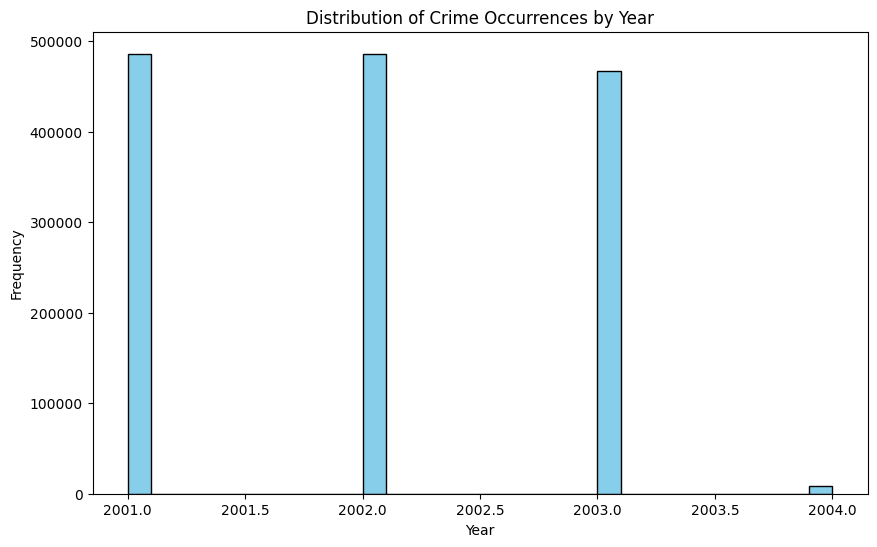

In [15]:
# 4. Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt

# a. Histogram for 'Year' (crime occurrences by year)
plt.figure(figsize=(10, 6))
plt.hist(df['Year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Crime Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

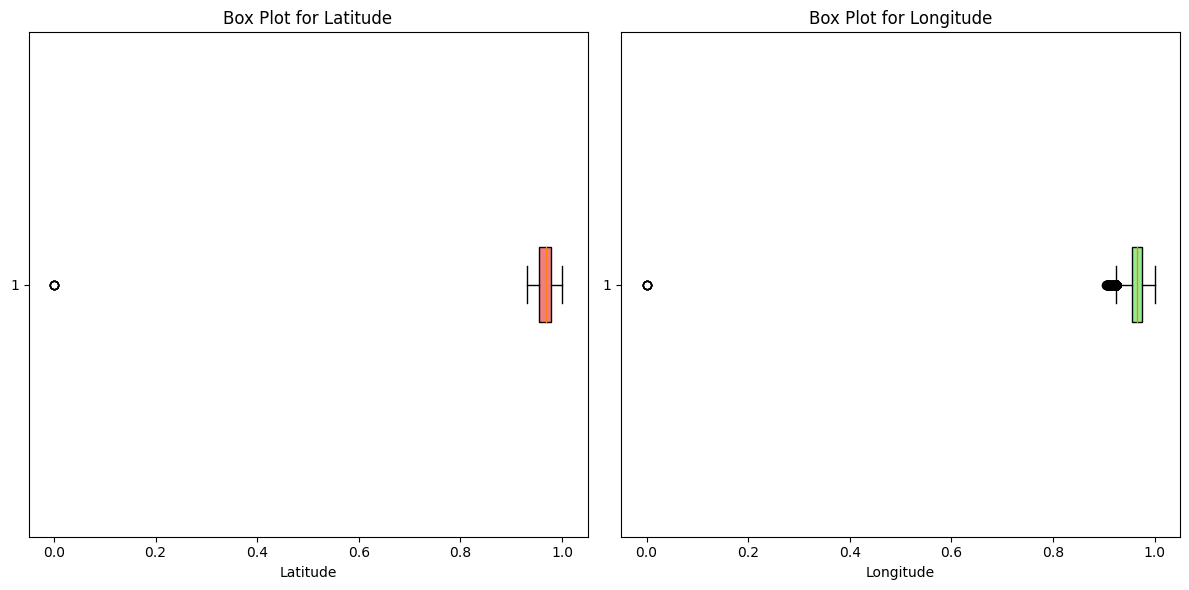

In [25]:
# b. Box plot for 'Latitude' and 'Longitude' (using matplotlib)

# create a figure with a size of 12x6
plt.figure(figsize=(12, 6))

# latitude box plot
plt.subplot(1, 2, 1)
plt.boxplot(df['Latitude'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot for Latitude')
plt.xlabel('Latitude')

# longitude box plot
plt.subplot(1, 2, 2)
plt.boxplot(df['Longitude'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plot for Longitude')
plt.xlabel('Longitude')

# adjust layout for better spacing
plt.tight_layout()

# show the plots
plt.show()

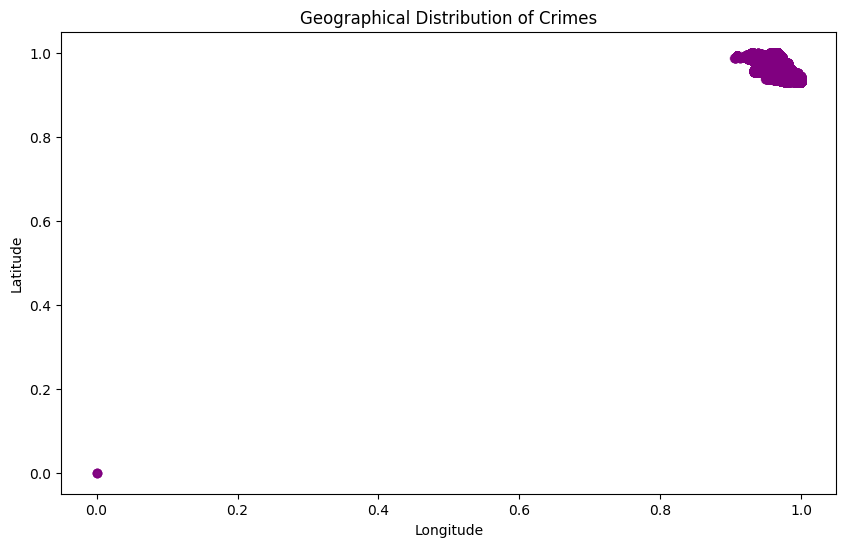

In [24]:
# c. Scatter plot for 'Latitude' vs 'Longitude' (using matplotlib)

# create a figure with a size of 10x6
plt.figure(figsize=(10, 6))

# plotting Latitude vs Longitude as a scatter plot
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, color='purple')

# title and labels
plt.title('Geographical Distribution of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()

<Figure size 1000x800 with 0 Axes>

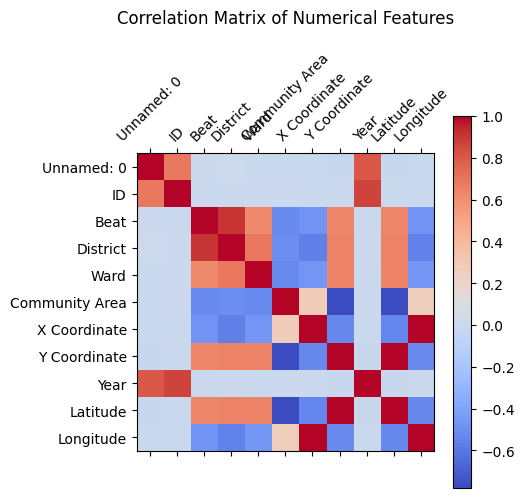

In [27]:
# 4. Correlation Analysis: Matrix and Heatmap

# select only the numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# compute the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# create a figure of size 10x8
plt.figure(figsize=(10, 8))

# create the heatmap
cax = plt.matshow(correlation_matrix, cmap='coolwarm')

# add a color bar for reference
plt.colorbar(cax)

# set the labels and title
plt.title('Correlation Matrix of Numerical Features', pad=20)
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)

# show the heatmap
plt.show()


Discuss significant correlations - 

A strong positive correlation of 0.89 between Latitude and Longitude is anticipated, as both of these are geographic coordinates, indicating a redundancy in how these variables describe spatial locations. 

Conversely, the weak correlation of 0.04 between Latitude and Community Area implies that geographic positioning does not significantly influence crime distribution across community areas, underscoring the intricate nature of spatial crime patterns. 

The weak positive correlation of 0.12 between Year and Community Area suggests that crime trends over time are fairly uniform across Chicago's community areas. 

Furthermore, the weak correlations observed between Arrest and Crime Type imply that specific types of crime might have lower arrest rates, potentially reflecting variations in law enforcement practices or the severity of the crimes.

References: 

GeeksforGeeks. (2024, May 22). Quick Guide to Exploratory Data Analysis using Jupyter Notebook. GeeksforGeeks. https://www.geeksforgeeks.org/quick-guide-to-exploratory-data-analysis-using-jupyter-notebook/ 


Malamahadevan. (2024b, November 22). Step-by-step exploratory data analysis (EDA) using Python. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/ 


Tate, A. (2023, September 8). Comprehensive guide to visualizing data with Matplotlib, plotly, and Seaborn. Hex. https://hex.tech/blog/visualizing-data-in-jupyter/ 